In [9]:
import sys 
sys.path.insert(1, '../')

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from cmath import sqrt
from DataAnalyzers.PeaksAnalyzer import calc_peacks

$$
\Large\left\{\begin{array}{c}
\dot{u}=1-u v \\
\dot{v}=p v\left(u-\frac{1+q}{q+v}\right)
\end{array}\right..
$$

$$
\Large
F(k)=\left(\begin{array}{cc}
a-D_{u} k^{2} & b \\
c & d-D_{v} k^{2}
\end{array}\right).
$$

$$
\Large a=f_{u}^{\prime}(\bar{u}, \bar{v}), \quad b=f_{v}^{\prime}(\bar{u}, \bar{v}), \quad c=g^{\prime}_{u}(\bar{u}, \bar{v}), \quad d=g^{\prime}_{v}(\bar{u}, \bar{v})
$$
$$
\Large a=-1, \quad b=-1, \quad c=p, \quad d=\frac{p}{1+q}
$$

$$
\Large{
F(k)=\left(\begin{array}{cc}
-1-D_{u} k^{2} & -1 \\
p & \frac{p}{1+q}-D_{v} k^{2}
\end{array}\right)}
$$

$$\Large \lambda^{2}-\operatorname{tr} F(k) \lambda+\operatorname{det} F(k)=0$$

In [2]:
def det_F(k,Du,Dv,p,q):
    return (-1-Du*k**2)*(p/(q+1)-Dv*k**2) + p

def tr_F(k,Du,Dv,p,q):
    return -1-Du*k**2+p/(q+1)-Dv*k**2

def solve_quad(k,Du,Dv,p,q):
    a = 1
    b = -tr_F(k,Du,Dv,p,q)
    c = det_F(k,Du,Dv,p,q)
    return ((-b-sqrt(b**2-4*a*c))/2).real

In [68]:
def plot_Re_lambda(k0,k1,Du,Dv,p,q):
    ks = np.arange(k0,k1,0.01)
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.plot(ks, [solve_quad(k,Du,Dv,p,q) for k in ks], label='$Re(\lambda)$')
    ax.set_title(f'$p={p}, q={q}, D_u={Du}, D_v={Dv}$')
    plt.grid()
    plt.legend()
    plt.show()
    
def plot_tr_and_det(k0,k1,Du,Dv,p,q,log=False):
    ks = np.arange(k0,k1,0.01)
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.plot(ks, [tr_F(k,Du,Dv,p,q) for k in ks], label='$tr(F)$',lw=3)
    dets = np.array([det_F(k,Du,Dv,p,q) for k in ks])
    ax.plot(ks,dets , label='$det(F)$', lw=3)
    peaks = None
    colors = {2.5:'r',3.0:'g',3.5:'b',4.0:'m',4.5:'y'}
    for k in ks:
        det = det_F(k,Du,Dv,p,q)
        if det > 0:
            continue
        peak = calc_peacks([np.cos(k*x) for x in np.arange(0,40.1,0.1)])['peaks']
        if peak%0.5<10**(-4) and peaks is None or round(peak,2) != round(peaks, 2):
            peaks = round(peak,1)
            ax.axvline(k, label=str(peaks),c=colors[peaks])
    ax.set_title(f'$p={p}, q={q}, D_u={Du}, D_v={Dv}$')
    if log:
        ax.set_yscale('log')
    plt.grid()
    plt.legend()
    plt.show()
    return ks[dets < 0]

def draw_cos(det):
    plt.figure(figsize=(10,5))
    plt.plot([np.cos(det*x) for x in np.arange(0,40.1,0.1)])
    plt.grid()
    plt.title(f'det_F = {round(det,3)}')
    plt.show()

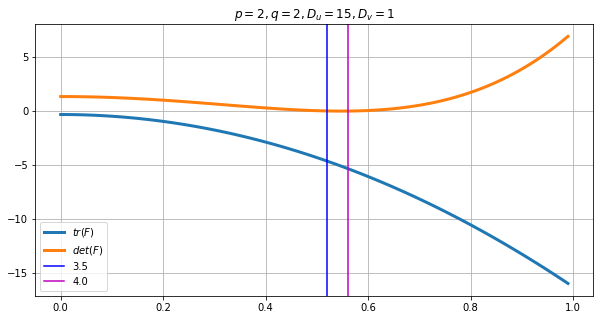

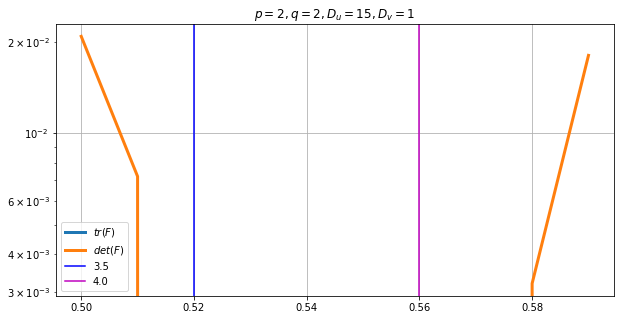

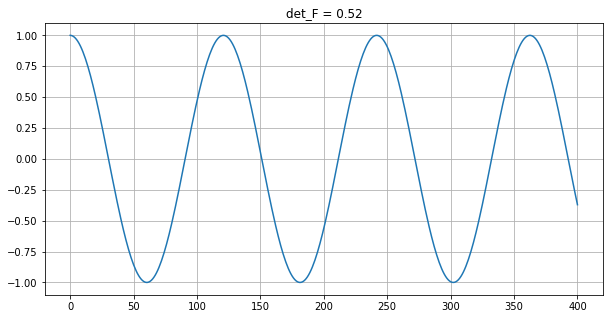

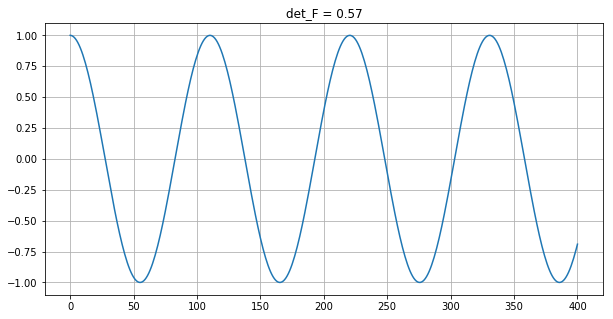

In [69]:
plot_tr_and_det(0,1,15,1,2,2)
dets = plot_tr_and_det(0.5,0.6,15,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])

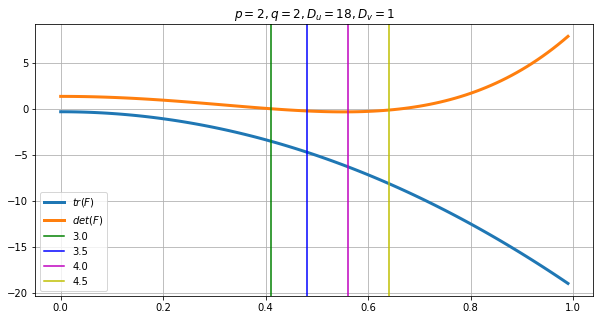

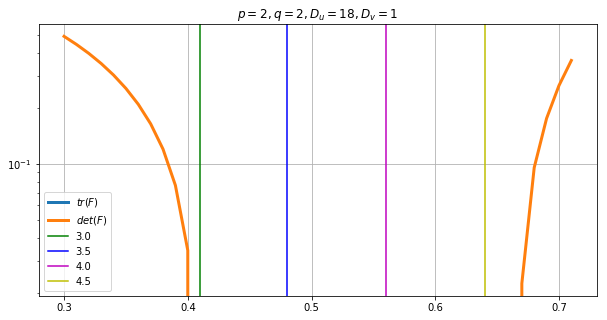

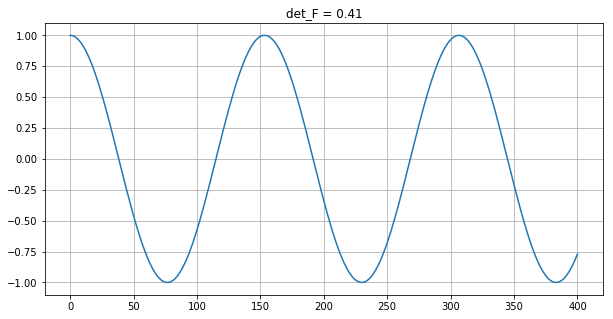

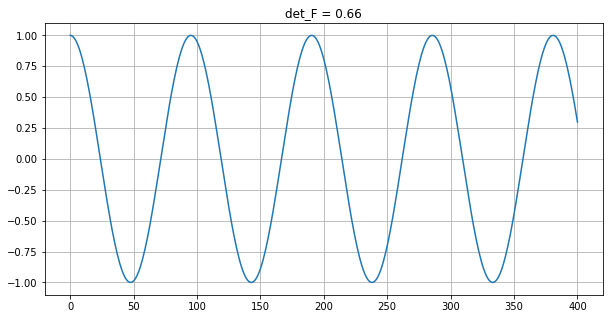

In [70]:
plot_tr_and_det(0,1,18,1,2,2)
dets = plot_tr_and_det(0.3,0.72,18,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])

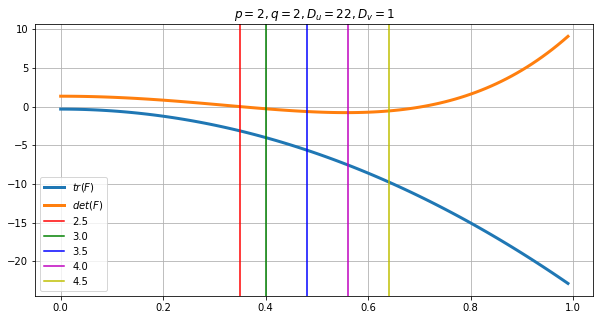

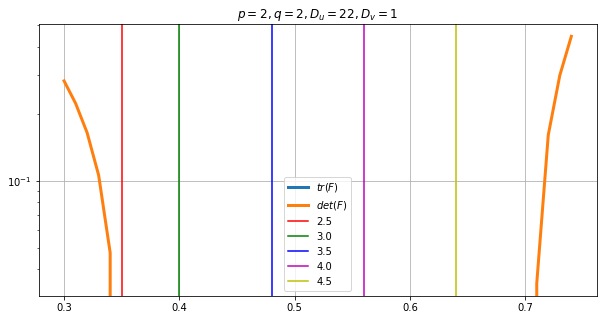

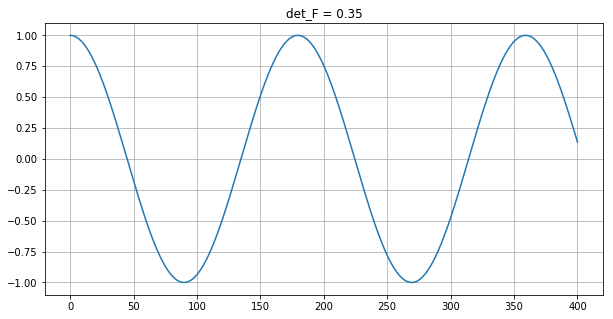

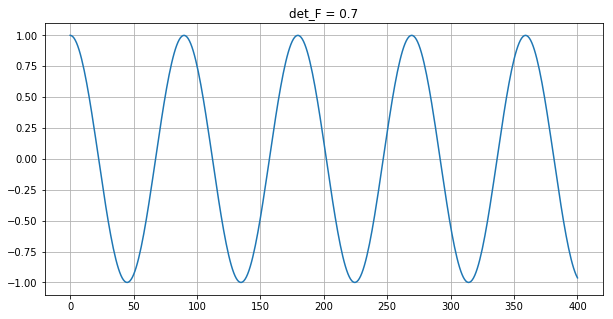

In [71]:
plot_tr_and_det(0,1,22,1,2,2)
dets = plot_tr_and_det(0.3,0.75,22,1,2,2,True)
draw_cos(dets[0])
draw_cos(dets[-1])